# 1 Introduction

## 1.1 Project Overview

This project involves building and evaluating a machine learning model using the BERT (Bidirectional Encoder Representations from Transformers) architecture to classify text documents into one of twenty different newsgroups. Due to the vast amount of information available in online forums and discussion groups, there's a growing need for automated tools to organize, search, and manage this data. By leveraging the BERT model, which understands the nuances of language by considering the context of each word in a sentence, we aim to achieve high accuracy in categorizing text documents, enhancing information retrieval and content management processes.

## 1.2 Project Objective

The primary objective of this project is to accurately classify text documents into their corresponding newsgroups among twenty possible categories. This involves:

Preprocessing the text data to fit the input requirements of the BERT model.
Fine-tuning a pre-trained BERT model on the 20 Newsgroups dataset to understand the context and content of the discussion threads.
Evaluating the model's performance using appropriate metrics to ensure its effectiveness in classifying unseen documents.
Exploring the impact of different preprocessing techniques and model hyperparameters on the classification accuracy to optimize the model's performance.

## 1.3 Evaluation Methodology

The model's performance will be evaluated using a hold-out test set that the model has not seen during training. This approach ensures that we assess the model's ability to generalize to new, unseen data. The primary metrics for evaluation will include:

- Accuracy: The proportion of total documents that are correctly classified.
- Precision, Recall, and F1 Score: To account for the imbalances in the dataset and to evaluate the model's ability to classify each newsgroup correctly. Precision measures the accuracy of positive predictions, recall measures the fraction of positives that were correctly identified, and the F1 score is the harmonic mean of precision and recall.
- Confusion Matrix: To visualize the model's performance across all categories, highlighting which newsgroups are more challenging to classify.

# 2 Data Collection

## 2.1 Description of the Dataset

The dataset used in this project is the "20 Newsgroups" dataset, a collection of approximately 20,000 newsgroup documents, partitioned nearly evenly across 20 different newsgroups. Some of the newsgroups are closely related to each other (e.g., comp.sys.ibm.pc.hardware / comp.sys.mac.hardware), while others are more distantly related (e.g., misc.forsale / soc.religion.christian). This variety introduces a mixture of both easy and challenging classification tasks.

Key characteristics of the dataset include:

- Text Data: The dataset consists entirely of text data, with each document representing a newsgroup post. The text includes a mix of headers, footers, and quoted replies, which can be optionally removed or included during preprocessing based on the project's goals.
- Multiple Classes: With 20 distinct newsgroups, the dataset supports multi-class classification tasks. The classes are balanced, with roughly the same number of documents per class.
- Real-World Data: The documents reflect real discussions and are rich in content, context, and linguistic nuance, making this dataset an excellent choice for natural language processing and understanding tasks.

## 2.2 Acquiring the Dataset

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Fetch the dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# 3 Exploratory Data Analysis

## 3.1 Text Statistics

In [3]:
# Number of documents
print('Number of documents in the training set:', len(newsgroups_train.data))
print('Number of documents in the test set:', len(newsgroups_test.data))


Number of documents in the training set: 11314
Number of documents in the test set: 7532


In [4]:
# Get average number of words per document
def average_words(documents):
    total_words = 0
    for document in documents:
        total_words += len(document.split())
    return total_words / len(documents)

# Average number of words per document
print('Average number of words per document in the training set:', average_words(newsgroups_train.data))
print('Average number of words per document in the test set:', average_words(newsgroups_test.data))

Average number of words per document in the training set: 287.4701255082199
Average number of words per document in the test set: 277.92671269251196


In [5]:
# Get vocabulary size
def vocabulary_size(documents):
    vocabulary = set()
    for document in documents:
        for word in document.split():
            vocabulary.add(word)
    return len(vocabulary)

# Vocabulary size
print('Vocabulary size in the training set:', vocabulary_size(newsgroups_train.data))
print('Vocabulary size in the test set:', vocabulary_size(newsgroups_test.data))

Vocabulary size in the training set: 280308
Vocabulary size in the test set: 201144


## 3.2 Class Distribution

In [6]:
# Print the categories
print(newsgroups_train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

/var/folders/qy/1t1mmmfn3ys3lwxkx12904f80000gn/T/ipykernel_8917/1505719282.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


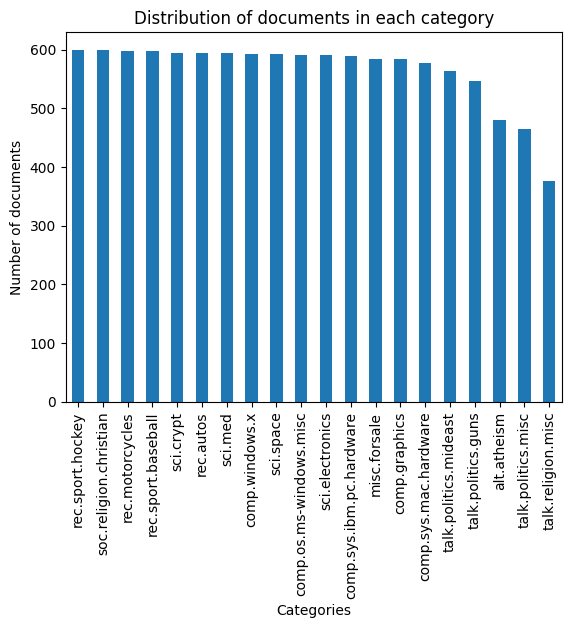

In [8]:
# Create a series from the target variable
category_counts = pd.Series(newsgroups_train.target).map(lambda x: newsgroups_train.target_names[x]).value_counts()
category_counts.plot(kind='bar')

# Set the title and labels
plt.xlabel('Categories')
plt.ylabel('Number of documents')
plt.title('Distribution of documents in each category')

# Show the plot
plt.show()

## 3.3 Word Frequency Analysis

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data
vectorizer.fit(newsgroups_train.data)

# Transofrm the training data
X_train = vectorizer.transform(newsgroups_train.data)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Calculate the word frequency
word_frequencies = X_train.sum(axis=0)

# Create a dataframe to store the word frequencies
df_word_frequencies = pd.DataFrame({"Word": feature_names, "Frequency": word_frequencies.flat})

# Sort the dataframe by word frequency
df_word_frequencies = df_word_frequencies.sort_values(by="Frequency", ascending=False)

# Print the 20 most frequent words
print(df_word_frequencies.head(20))

        Word  Frequency
114455   the     146532
115475    to      75064
89362     of      69034
30827     ax      62406
28146    and      57957
66608     in      49401
68532     is      43480
114440  that      39264
68766     it      33638
56283    for      28600
128402   you      26682
56979   from      22670
50527    edu      21321
89860     on      20491
114731  this      20121
32311     be      19285
29241    are      18616
87949    not      18424
62221   have      18074
124616  with      17325


## 3.4 N-gram Analysis

In [11]:
# Create a CountVectorizer object with ngram_range=(2, 2)
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit the vectorizer on the training data
vectorizer.fit(newsgroups_train.data)

# Transform the training data
X_train = vectorizer.transform(newsgroups_train.data)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Calculate the bigram frequency
bigram_frequencies = X_train.sum(axis=0)

# Create a dataframe to store the bigram frequencies
df_bigram_frequencies = pd.DataFrame({"Bigram": feature_names, "Frequency": bigram_frequencies.flat})

# Sort the dataframe by bigram frequency
df_bigram_frequencies = df_bigram_frequencies.sort_values(by="Frequency", ascending=False)

# Print the 20 most frequent bigrams
print(df_bigram_frequencies.head(20))


               Bigram  Frequency
171701          ax ax      56319
665262         of the      15462
487052         in the      10916
868275     subject re       7420
941597         to the       6066
482910     in article       5858
673967         on the       5809
513619          it is       4814
641304   nntp posting       4794
935552          to be       4791
729646   posting host       4786
391408        for the       4418
587245         max ax       4331
898148       that the       4322
171919         ax max       4314
477105         if you       3819
134178        and the       3757
1021835      with the       3138
925454        this is       3090
509273         is the       2963


In [12]:
# Create a CountVectorizer object with ngram_range=(3, 3)
vectorizer = CountVectorizer(ngram_range=(3, 3))

# Fit the vectorizer on the training data
vectorizer.fit(newsgroups_train.data)

# Transform the training data
X_train = vectorizer.transform(newsgroups_train.data)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Calculate the trigram frequency
trigram_frequencies = X_train.sum(axis=0)

# Create a dataframe to store the trigram frequencies
df_trigram_frequencies = pd.DataFrame({"Trigram": feature_names, "Frequency": trigram_frequencies.flat})

# Sort the dataframe by trigram frequency
df_trigram_frequencies = df_trigram_frequencies.sort_values(by="Frequency", ascending=False)

# Print the 20 most frequent trigrams
print(df_trigram_frequencies.head(20))


                            Trigram  Frequency
284922                     ax ax ax      50668
1127650           nntp posting host       4786
1036870                   max ax ax       4257
285094                    ax ax max       4200
285623                    ax max ax       4179
1240949  organization university of       1657
1945589           writes in article       1384
1216883                  one of the        791
695499                  g9v g9v g9v        658
1691039                 there is no        626
298797                   be able to        589
117941                  a86 a86 a86        481
1940965               would like to        471
482949                 cso uiuc edu        451
531477      distribution world nntp        441
908942                    it is not        441
1937013          world nntp posting        441
1626161               the fact that        441
1497875                 some of the        420
1592357                  that it is        417


## 3.5 Correlation Analysis

# 4 Data Pre-processing Pipeline

## 4.1 Text Cleaning

In [13]:
import re

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)

    # Remove leading and trailing whitespaces
    text = text.strip()

    return text

In [14]:
# Clean the training data
newsgroups_train_clean = [clean_text(document) for document in newsgroups_train.data]

# Clean the test data
newsgroups_test_clean = [clean_text(document) for document in newsgroups_test.data]

## 4.2 Removing Noise

In [15]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text):
    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Join the words back into a single string
    text = ' '.join(words)

    return text

In [16]:
# Remove stopwords from the training data
newsgroups_train_clean = [remove_stopwords(document) for document in newsgroups_train_clean]

# Remove stopwords from the test data
newsgroups_test_clean = [remove_stopwords(document) for document in newsgroups_test_clean]

## 4.3 Normalization

In [17]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)]
    lemmatize_text = ' '.join(lemmatized_words)

    return lemmatize_text

In [18]:
# Lemmatize the training data
newsgroups_train_clean = [lemmatize_text(document) for document in newsgroups_train_clean]

# Lemmatize the test data
newsgroups_test_clean = [lemmatize_text(document) for document in newsgroups_test_clean]

# 5 Baseline Model

## 5.1 Addition Pre-processing

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
vectorizer.fit(newsgroups_train_clean)

# Transform the training data
X_train = vectorizer.transform(newsgroups_train_clean)

# Transform the test data
X_test = vectorizer.transform(newsgroups_test_clean)

# Get the target variable
y_train = newsgroups_train.target
y_test = newsgroups_test.target

## 5.1 Model Training

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [22]:
# Create a MultinomialNB object
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

MultinomialNB()

## 5.2 Model Evaluation

In [23]:
# Predict the categories of the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the classification report
classification_report = classification_report(y_test, y_pred, target_names=newsgroups_test.target_names)
print('\nClassification Report:\n', classification_report)

Accuracy: 0.8169144981412639

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.85      0.58      0.69       319
           comp.graphics       0.79      0.74      0.76       389
 comp.os.ms-windows.misc       0.82      0.69      0.75       394
comp.sys.ibm.pc.hardware       0.69      0.81      0.74       392
   comp.sys.mac.hardware       0.87      0.86      0.86       385
          comp.windows.x       0.89      0.81      0.85       395
            misc.forsale       0.93      0.77      0.84       390
               rec.autos       0.88      0.93      0.91       396
         rec.motorcycles       0.94      0.96      0.95       398
      rec.sport.baseball       0.95      0.94      0.95       397
        rec.sport.hockey       0.93      0.98      0.95       399
               sci.crypt       0.69      0.96      0.80       396
         sci.electronics       0.83      0.68      0.75       393
                 sci.

# 6 BERT Model

## 6.1 Additional Pre-processing

In [34]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

In [25]:
# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to preprocess the text
def preprocess(texts):
    # Tokenize the text
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        # Add the encoded text to the list
        input_ids.append(encoded['input_ids'])

        # Add the attention mask to the list
        attention_masks.append(encoded['attention_mask'])

    # Convert lists to tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

In [26]:
# Preprocess the training data
X_train, attention_train = preprocess(newsgroups_train.data)
X_test, attention_test = preprocess(newsgroups_test.data)

In [27]:
# Prepare the target variable
y_train = torch.tensor(newsgroups_train.target)
y_test = torch.tensor(newsgroups_test.target)

In [28]:
# Create a TensorDataset
train_dataset = TensorDataset(X_train, attention_train, y_train)
test_dataset = TensorDataset(X_test, attention_test, y_test)

# Create a DataLoader
batch_size = 16

train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)

test_sampler = SequentialSampler(test_dataset)
test_loader = DataLoader(test_dataset, sampler=test_sampler, batch_size=batch_size)

## 6.2 Model Training

In [31]:
import torch.nn as nn
import torch.optim as optim
import time
import datetime

In [35]:
# Specify the number of classes
num_labels = len(newsgroups_train.target_names)

# Create a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      num_labels=num_labels,
                                                      output_attentions=True,
                                                      output_hidden_states=False)

# Set the device to CUDA if available, otherwise MPS if available, otherwise CPU
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('Using CUDA')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print('Using MPS')
else:
    device = torch.device('cpu')
    print('Using CPU')

# Move the model to the device
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using MPS


In [38]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Number of epochs
epochs = 3

# The total number of steps is the number of batches * the number of epochs
total_steps = len(train_loader) * epochs

# Create a learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

In [41]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Function to format elapsed times as hh:mm:ss
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode.
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_loader):
        # Unpack this training batch from our dataloader. 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        loss = outputs.loss

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0 to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_loader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 3 ========
Training...

  Average training loss: 0.57
  Training epoch took: 6:36:46

======== Epoch 2 / 3 ========
Training...

  Average training loss: 0.22
  Training epoch took: 7:40:13

======== Epoch 3 / 3 ========
Training...

  Average training loss: 0.11
  Training epoch took: 7:36:00

Training complete!


In [42]:
# Save the Model
# Define a path for saving the model
model_save_path = 'bert_model_newsgroup.bin'

# Save the entire model
torch.save(model.state_dict(), model_save_path)

print("Model saved to %s" % model_save_path)

Model saved to bert_model_newsgroup.bin


## 6.3 Model Evaluation

In [49]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

In [50]:
def evaluate_model(model, dataloader, device):
    model.eval()  # Put the model in evaluation mode

    # Initialize lists to store true labels and predictions
    true_labels = []
    predictions = []

    # No gradient needed
    with torch.no_grad():
        for batch in dataloader:
            b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)

            # Forward pass, calculate logit predictions
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

            logits = outputs.logits
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Store predictions and true labels
            batch_preds = np.argmax(logits, axis=1)
            predictions.extend(batch_preds)
            true_labels.extend(label_ids)

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')

    return accuracy, precision, recall, f1

# Evaluate the model
accuracy, precision, recall, f1 = evaluate_model(model, test_loader, device)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8621
Precision: 0.8649
Recall: 0.8621
F1 Score: 0.8621


## 6.4 Model Inference

In [51]:
# Recreate the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      num_labels=num_labels,
                                                      output_attentions=True,
                                                      output_hidden_states=False)

# Pass to saved model
model_save_path = 'bert_model_newsgroup.bin'

# Load the model
model.load_state_dict(torch.load(model_save_path))

# Set the device to CUDA if available, otherwise MPS if available, otherwise CPU
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('Using CUDA')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print('Using MPS')
else:
    device = torch.device('cpu')
    print('Using CPU')

# Move the model to the device
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using MPS


In [53]:
text_for_prediction = "The new iPhone is coming out soon. I am excited to see the new features!"

# Preprocess the text
input_ids, attention_masks = preprocess([text_for_prediction])

# Move the input data to the device
input_ids = input_ids.to(device)
attention_masks = attention_masks.to(device)

# Make the prediction
with torch.no_grad():
    outputs = model(input_ids)

# Get the predicted category
logits = outputs.logits
predicted_category = torch.argmax(logits).item()

# Print the predicted category
print(predicted_category)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


4
